In [7]:
#Importamos librerias 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [8]:
#Utilizamos funcion para realizar la importacion del archivo
dataset = pd.read_csv("../Python/covid.csv")

In [9]:
dataset.head(40)

,date,country,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
5,2020-01-05,Afghanistan,0,0,0,0
6,2020-01-06,Afghanistan,0,0,0,0
7,2020-01-07,Afghanistan,0,0,0,0
8,2020-01-08,Afghanistan,0,0,0,0
9,2020-01-09,Afghanistan,0,0,0,0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7320 entries, 0 to 7319
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          7320 non-null   object
 1   country       7320 non-null   object
 2   new_cases     7320 non-null   int64 
 3   new_deaths    7320 non-null   int64 
 4   total_cases   7320 non-null   int64 
 5   total_deaths  7320 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 343.2+ KB


In [11]:
X = dataset.iloc[:,1:4]

In [12]:
X = pd.get_dummies(X)

In [13]:
X = X.values

In [14]:
X

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [2, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [37]:
Y = dataset.iloc[:,-1].values

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .25, random_state = 42)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
KNN = KNeighborsClassifier(n_neighbors=5, 
                           weights='uniform', 
                           algorithm='kd_tree', 
                           leaf_size=30, 
                           p=2, 
                           metric='minkowski', 
                           n_jobs=-1)

In [42]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [53]:
Y_pred = KNN.predict(X_test)


C:\Users\Andres\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(classification_report(Y_test.reshape(-1,1), Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1474
           1       0.46      0.26      0.33       119
           2       0.19      0.14      0.16        35
           3       0.28      0.16      0.20        32
           4       0.18      0.15      0.17        13
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

C:\Users\Andres\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andres\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andres\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andres\anaconda3\lib\site-packages\sklearn\metrics\

In [56]:
print(confusion_matrix(Y_test, Y_pred))

[[1456    9    2 ...    0    0    0]
 [  81   31    4 ...    0    0    0]
 [  20    7    5 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [58]:
from sklearn.model_selection import cross_val_score

In [63]:
print ('Cross val',cross_val_score(KNN,Y_test.reshape(-1,1), Y_pred, cv=10))
print ('Cross val',np.mean,cross_val_score(KNN,Y_test.reshape(-1,1), Y_pred))

Cross val [0.87978142 0.87431694 0.86338798 0.87431694 0.87978142 0.87431694
 0.86885246 0.8852459  0.87978142 0.87978142]
Cross val <function mean at 0x0000022FC32C7790> [0.87704918 0.8579235  0.87978142 0.87704918 0.87431694]


C:\Users\Andres\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Andres\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Andres\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this

C:\Users\Andres\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Andres\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Andres\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Andres\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Andres\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Andres\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Text(0, 0.5, 'Mean Error')

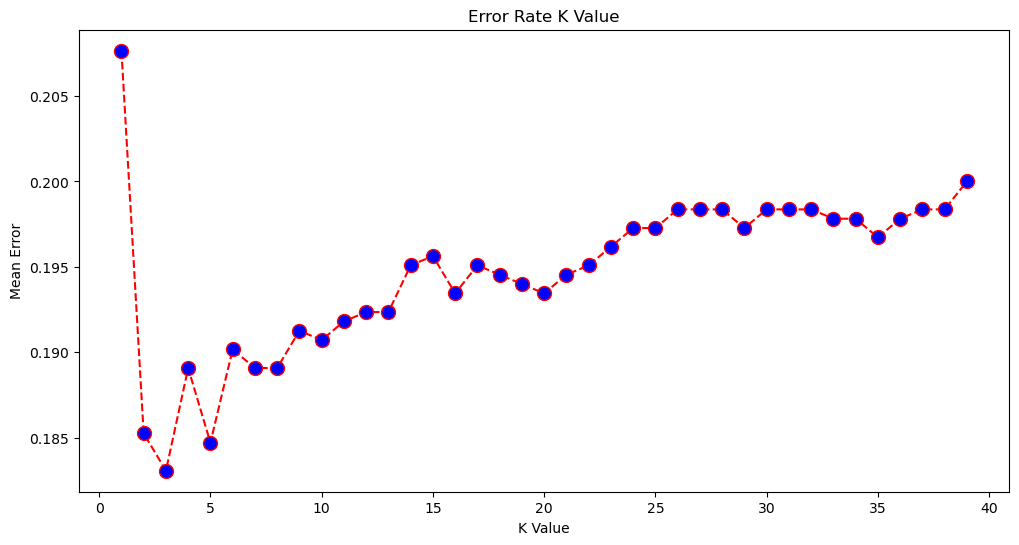

In [70]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, Y_train)
    pred_i = KNN.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')